# Exercise 1

In [68]:
import pandas as pd

### Read data

In [69]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/MarketingData.csv")
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [70]:
# Check if any missing values 
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Channel             0
dtype: int64

In [71]:
df.isnull().values.any()

False

In [72]:
# Summarize dataset
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5853.350191,5267.873868,4873.362341,4899.477763,4786.331781,5613.672184,1.499350
std,1128.370297,1177.563192,1265.579790,1220.923393,1154.682284,1343.743103,1.118464
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5155.249455,4438.167387,3983.317183,4071.997222,3877.943500,4705.582182,0.000000
50%,5988.720207,5337.741327,4828.100401,5048.099489,4857.070488,5425.888761,1.000000
75%,6573.895741,6081.755179,5784.992859,5684.876863,5602.146034,6574.281056,3.000000
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000


## Check levels of target variables 

In [73]:
df.Channel.value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

## Split data into training and testing

In [74]:
# Arrange feature inputs and target 
X=df.iloc[:, 0:6]
y=df["Channel"]

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

## Building a Logistic Regression Model

In [76]:
from sklearn.linear_model import LogisticRegression
logitModel=LogisticRegression(multi_class="multinomial",solver="lbfgs")
logitModel.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

## Make prediction on test data

In [77]:
y_pred=logitModel.predict(X_test)

df_pred=pd.DataFrame({"Actual": [x for x in y_test.values.tolist()], "Predicted": [x for x in y_pred.tolist()]})

df_pred.head()

,Actual,Predicted
0,1,2
1,3,3
2,2,1
3,1,2
4,2,2


## Check Model Accuracy

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
# Check model accuracy 
logitModel.score(X_test, y_test) # First way

modelAccuracy=accuracy_score(y_test,y_pred) # Alternative way
modelAccuracy

0.6764

In [80]:
# Check True 
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test,y_pred, average="macro")

(0.6692875329629434, 0.6742817876544682, 0.6712722534450623, None)

In [81]:
# Better way of reporting model accuracy 
from sklearn.metrics import classification_report

accuracy=classification_report(y_test,y_pred, target_names=["Retail","Roadshow","Social Media","Television"])
print(accuracy)

              precision    recall  f1-score   support

      Retail       0.66      0.68      0.67      1229
    Roadshow       0.53      0.48      0.50      1244
Social Media       0.67      0.67      0.67      1228
  Television       0.82      0.87      0.84      1299

    accuracy                           0.68      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.68      0.67      5000



In [82]:
# We can print out confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 835,  242,   81,   71],
       [ 268,  599,  243,  134],
       [ 112,  246,  822,   48],
       [  49,   43,   81, 1126]], dtype=int64)

### Visualizing the accuracy table

In [83]:
# Set target names
target_names=["Retail","Roadshow","Social Media","Television"]
df_cm=pd.DataFrame(cm, index=target_names, columns=target_names)
df_cm

,Retail,Roadshow,Social Media,Television
Retail,835,242,81,71
Roadshow,268,599,243,134
Social Media,112,246,822,48
Television,49,43,81,1126


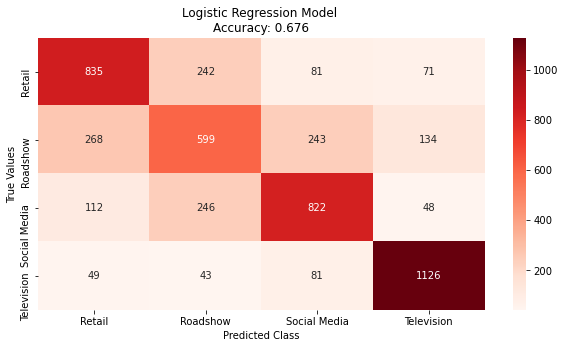

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df_cm, annot=True, fmt="g", cmap="Reds")
plt.title("Logistic Regression Model \nAccuracy: {:.03}".format(modelAccuracy))
plt.xlabel("Predicted Class")
plt.ylabel("True Values")
plt.show()

# Exercise 2

## Read dataset 

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data pre-processing

In [100]:
# Remove some unused columns
df=df.drop(["RowNumber","CustomerId","Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
# Summary of data
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [102]:
# Check if any missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [103]:
# Check target variables values 
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [104]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [105]:
# Check if variable is object or float

[x for x in df.columns if df.dtypes[x]=="object"]

['Geography', 'Gender']

### Features and target for modelling

In [106]:
X=df.iloc[:, 0:8]
X_sample=X
y=df["Exited"]

In [107]:
# Get country count in geography column
X.groupby(by="Geography").count()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard
Geography,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477


In [108]:
X.groupby(by="Gender")["Balance"].count()

Gender
Female    4543
Male      5457
Name: Balance, dtype: int64

In [109]:
# Transform categorical variables to numeric variables

X=pd.get_dummies(X)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,1,0,0,1,0
3,699,39,1,0.00,2,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,0,0,1,1,0


### Split data

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=123)

## Building a logistic regression model

In [111]:
from sklearn.linear_model import LogisticRegression
logitModel=LogisticRegression()
logitModel.fit(X_train, y_train)

LogisticRegression()

### Making prediction on test data

In [112]:
y_pred=logitModel.predict(X_test)

### Accuracy assessment

In [113]:
# Overall accuracy 
logitModel.score(X_test, y_test)

0.783

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.783

In [115]:
# Get confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[1547,   39],
       [ 395,   19]], dtype=int64)

In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1586
           1       0.33      0.05      0.08       414

    accuracy                           0.78      2000
   macro avg       0.56      0.51      0.48      2000
weighted avg       0.70      0.78      0.71      2000



In [117]:
from sklearn.metrics import recall_score, precision_score
print("Precision Score: ",precision_score(y_test, y_pred))

Precision Score:  0.3275862068965517


In [118]:
print("Recall score: ",recall_score(y_test,y_pred))

Recall score:  0.04589371980676329


### Visualizing the roc curve

In [119]:
from sklearn.metrics import roc_curve, auc

In [120]:
# Obtain ROC_curve score using probabilities 
probs=logitModel.predict_proba(X_test)
scores=probs[:,1]
scores

array([0.06821549, 0.07639378, 0.12849573, ..., 0.28037577, 0.22548812,
       0.23513955])

In [121]:
logitModel.predict_proba(X_test)

array([[0.93178451, 0.06821549],
       [0.92360622, 0.07639378],
       [0.87150427, 0.12849573],
       ...,
       [0.71962423, 0.28037577],
       [0.77451188, 0.22548812],
       [0.76486045, 0.23513955]])

In [122]:
fpr, tpr, thresholds=roc_curve(y_test,scores)

Text(0, 0.5, 'True Positive Rate')

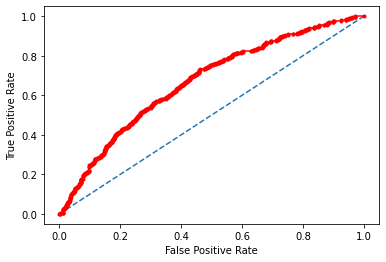

In [123]:
plt.plot([0,1],[0,1], linestyle="--")
plt.plot(fpr,tpr, marker=".", color="r")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [124]:
auc(fpr,tpr)

0.6687653441039043

### Create a new dataset for prediction

In [125]:
new_samples=X_sample.iloc[[0,1,2,10,20]]
new_samples

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard
0,619,France,Female,42,2,0.00,1,1
1,608,Spain,Female,41,1,83807.86,1,0
2,502,France,Female,42,8,159660.80,3,1
10,528,France,Male,31,6,102016.72,2,0
20,732,France,Male,41,8,0.00,2,1


In [126]:
new_samples=pd.get_dummies(new_samples)
new_samples

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,Geography_France,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,0,1,0
1,608,41,1,83807.86,1,0,0,1,1,0
2,502,42,8,159660.80,3,1,1,0,1,0
10,528,31,6,102016.72,2,0,1,0,0,1
20,732,41,8,0.00,2,1,1,0,0,1


##### Check if any missing columns

In [127]:
missing_columns=set(X.columns)-set(new_samples.columns)
missing_columns

{'Geography_Germany'}

In [128]:
for i in missing_columns:
    new_samples[i]=0

In [129]:
logitModel.predict(new_samples)

array([0, 0, 0, 0, 0], dtype=int64)

# Improving model accuracy

### Solution 1: Using ExtraTreesClassifier to select best features

In [130]:
from sklearn.ensemble import ExtraTreesClassifier

bestFeature=ExtraTreesClassifier()
bestFeature.fit(X,y)

ExtraTreesClassifier()

In [135]:
# Retrieving the feature importance
bestVariable=pd.DataFrame({"Feature":X.columns,"Score":bestFeature.feature_importances_})
bestVariable=bestVariable.sort_values(["Score"])
bestVariable.reset_index(drop=True, inplace=True)
bestVariable

,Feature,Score
0,Gender_Male,0.005475
1,Geography_Spain,0.006119
2,Gender_Female,0.006450
3,Geography_France,0.007486
4,HasCrCard,0.018679
5,Geography_Germany,0.020503
6,Tenure,0.124984
7,NumOfProducts,0.150869
8,Balance,0.180564
9,CreditScore,0.203107


<BarContainer object of 11 artists>

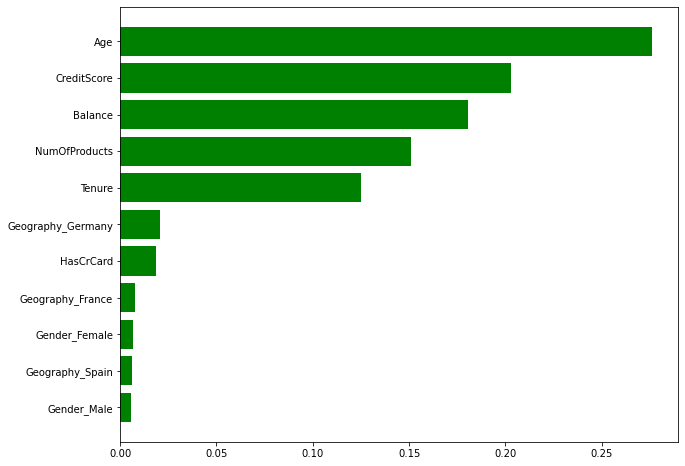

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(bestVariable.Feature, bestVariable.Score, color="g")

- We can refit the model with first five variables.

#### Solution 2: Using SelectKBest to choose best features

In [143]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [146]:
bestFeature=SelectKBest(score_func=chi2, k="all")
bestFeature.fit(X,y)

SelectKBest(k='all', score_func=<function chi2 at 0x000002196863E9D0>)

In [148]:
df_score=pd.DataFrame({"Feature":X.columns, "Score":bestFeature.scores_})
df_score

,Feature,Score
0,CreditScore,1.054035e+02
1,Age,2.300417e+03
2,Tenure,3.270538e+00
3,Balance,7.151303e+06
4,NumOfProducts,5.055394e+00
5,HasCrCard,1.500410e-01
6,Geography_France,5.492371e+01
7,Geography_Germany,2.254644e+02
8,Geography_Spain,2.086721e+01
9,Gender_Female,6.190917e+01
